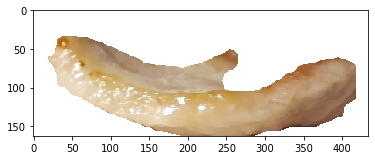

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1406: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'cv::threshold'


In [5]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('KakaoTalk_20200320_183203956_23.jpg')

# ret, binary = cv2.threshold(img, 127, 155, cv2.THRESH_BINARY)
# plt.imshow(cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR))
plt.imshow(img)
plt.show()
img2 = cv2.GaussianBlur(img, (5,5), 0)

imgs = []
ret, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret, t_bininv2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

ret, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)
imgs.append(t_bin)
imgs.append(t_bininv)
imgs.append(t_bininv2)
img = t_bininv2

imgs.append(t_truc)
imgs.append(t_2zr)
imgs.append(t_2zrinv)
for i in imgs:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
    plt.show()

In [4]:
# for i in range(255):
#     ret, t_bin = cv2.threshold(img, i, 255, cv2.THRESH_BINARY)
#     plt.imshow(cv2.cvtColor(t_bin, cv2.COLOR_GRAY2RGB))
#     plt.show()
# #     break

In [6]:
# th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#                             cv2.THRESH_BINARY, 21, 3)
# plt.imshow(cv2.cvtColor(th2, cv2.COLOR_GRAY2RGB)) 
# plt.show()

### Resize

In [ ]:
# im2 = cv2.resize(img, (600, 300))

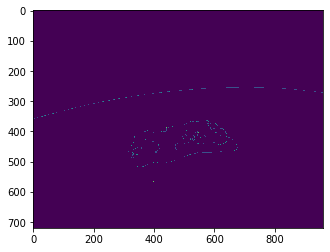

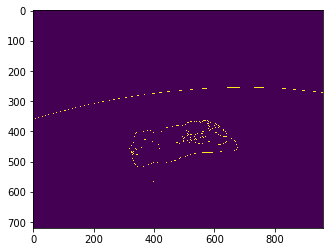

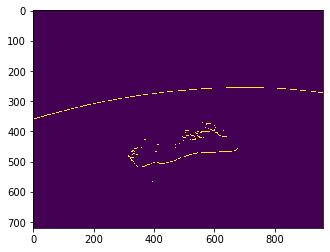

In [14]:
edge = cv2.Laplacian(img, 2)
plt.imshow(edge)
plt.show()

canny = cv2.Canny(img, 100, 200)
plt.imshow(canny)
plt.show()

import numpy as np

scharrx = cv2.Scharr(img, -1, 1, 0)
scharry = cv2.Scharr(img, -1, 0, 1)
plt.imshow(scharrx)
plt.imshow(scharry)

plt.show()

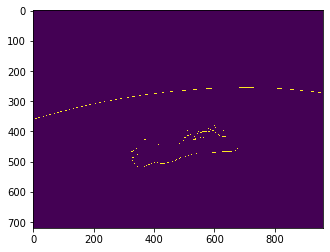

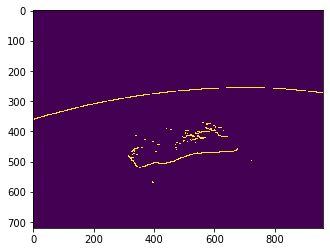

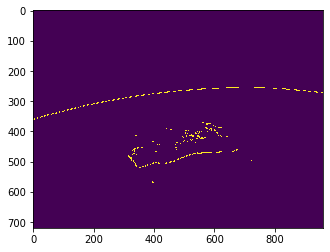

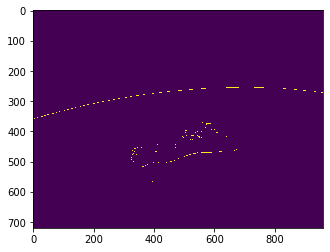

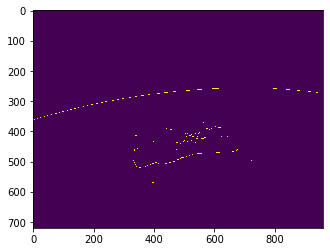

In [15]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
img = scharry

erosion = cv2.erode(img, k)
dst = cv2.dilate(img, k)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, k)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, k)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, k)

for image in [erosion, dst, gradient, tophat, blackhat]:
    plt.imshow(image)
    plt.show()

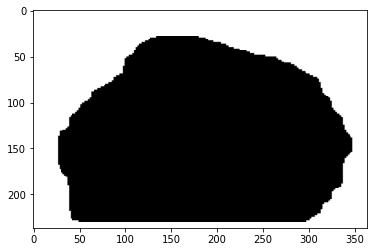

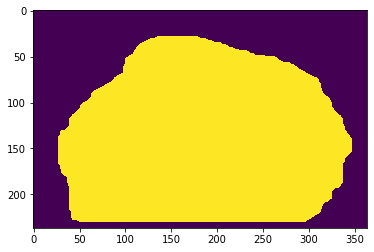

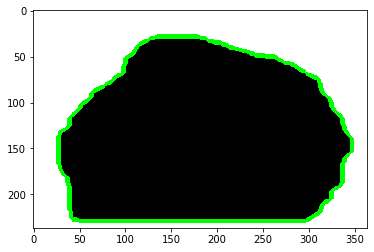

In [34]:
import cv2 
import matplotlib.pyplot as plt 

# image = cv2.imread('./cooked1.jpg')
image = cv2.imread('cropped2.png')

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
img2 = cv2.GaussianBlur(image_gray, (5,5), 0)
plt.imshow(image)
plt.show()
ret, thresh = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# image = cv2.Laplacian(image, -1)
points = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # 그레이 형태로 불러옴 
# ret, thresh = cv2.threshold(image_gray, 127, 255, cv2.THRESH_BINARY_INV) # 이진화 처리 -> 컴퓨터가 더 찾기 쉽기 때문이다.
# thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
#                             cv2.THRESH_BINARY, 21, 3)
# thresh = cv2.dilate(thresh, k)

plt.imshow(thresh)
plt.show()

img, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE) # 모든 계층 정보를 트리 구조로 제공/컨투어 꼭짓점 좌표만 제공

# for contour in contours:
#     area = cv2.contourArea(contour)
    
#     if area > 30:
cv2.drawContours(image, contours, -1, (0,255,0), 3) # -1은 전체의 컨투어

# 모든 컨투어를 그린다.
# image = cv2.drawContours(image, contours, -1, (255,0,0), 2) # -1은 전체의 컨투어

%matplotlib inline
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

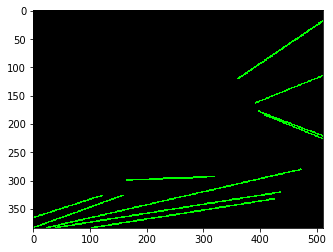

In [72]:
lines = cv2.HoughLinesP(thresh, 1, np.pi/180, 10, 10, 100)[:10]
# print(lines[:3])

dbg_img = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
for line in lines:
    for x1, y1, x2, y2 in line:
#         print("Detected Line : ({},{} {},{})".format(x1, y1, x2, y2))
        cv2.line(dbg_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(dbg_img)
plt.show()

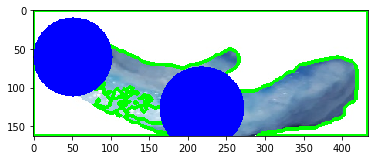

In [17]:
contour = contours[0] #숫자 비꿔보기
hull = cv2.convexHull(contour)
image = cv2.drawContours(image, [hull], -1, (255, 0, 0), 100)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
import numpy as np

contours = sorted(contours, key = cv2.contourArea, reverse=True)
print(len(contours))
for c in contours:
    rect = cv2.minAreaRect(c)
    bp = cv2.boxPoints(rect) 
    bp = np.int0(bp)
    
    cv2.drawContours(points, [bp], -1, (0, 255, 0), 3) 
    plt.imshow(points)
    plt.show()
    
#     peri = cv2.arcLength(c, True)
#     approx = cv2.approxPolyDP(c, 0.001*peri, True)
#     print(approx)
#     if len(approx) == 4:
#         screenCnt = approx
#         break
        
# print('Step : find contours of Paper')

# cv2.drawContours(points, [screenCnt], -1, (0, 255, 0), 3) 
# plt.imshow(points)
# plt.show()

15


AttributeError: module 'cv2.cv2' has no attribute 'maxAreaRect'

In [8]:
import cv2 as cv
import numpy as np


img_color = cv.imread('cooked1.jpg')
img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
ret, img_binary = cv.threshold(img_gray, 127, 255, 0)
_, contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)


for cnt in contours:
    cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

cv.imshow("result", img_color)

cv.waitKey(0)




for cnt in contours:

    hull = cv.convexHull(cnt)
    cv.drawContours(img_color, [hull], 0, (255, 0, 255), 5)


cv.imshow("result", img_color)
cv.waitKey(0)

cv.destroyAllWindows()

In [ ]:
import cv2 as cv
import numpy as np
import os

# 파일 이름 eatable or uneatable
path = '../../../Data/Fork_classifier_dataset/uneatable/'

file_list = os.listdir(path)
print(file_list)
print("the number of files: ", len(file_list))

roi = []

for file in file_list:
    
    print("file: ", file)
    
    # 이미지 읽기
    img_color = cv.imread(path + file)

    # 구조화 요소 커널, 사각형 (3x3) 생성
    k = cv.getStructuringElement(cv.MORPH_RECT, (10, 10))

    # 침식 연산 적용
    # erode = cv.erode(img_color, k)

    # 팽창 연산 적용
    # dst = cv.dilate(erode, k)

    # 이미지를 흑백으로 변환
    img_gray = cv.cvtColor(img_color, cv.COLOR_BGR2GRAY)
    
    # 가우시안 블러 적용
    blurred_img = cv2.GaussianBlur(img_gray, (5,5), 0)
    
    # 오츠 적용
    ret, t_bininv2 = cv2.threshold(blurred_img, 127, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    '''
    # 흑백 이미지를 이진화
    ret, img_binary = cv.threshold(img_gray, 127, 255, 0)
    '''
    
    # 모든 컨투어 찾아내기
    contours, hierarchy = cv.findContours(img_binary, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

    '''
    for cnt in contours:
        cv.drawContours(img_color, [cnt], 0, (255, 0, 0), 3)  # blue

    cv.imshow("result1", img_color)
    cv.waitKey(0)

    for cnt in contours:
        x, y, w, h = cv.boundingRect(cnt)
        cv.rectangle(img_color, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv.imshow("result2", img_color)
    cv.waitKey(0)
    '''

    for cnt in contours:
        
        # 외접하는 직사각형 구하기
        rect = cv.minAreaRect(cnt) # minAreaRect(): 인자로 입력한 contour에 외접하면서 면적이 가장 작은 직사각형을 구하는 데 활용됩니다.

        # 직사각형의 각 좌표 구하기
        bp = cv.boxPoints(rect) # boxPoints(): cv.minAreaRect() 함수로 얻은 직사각형의 꼭지점 4개의 좌표를 얻기 위해 사용됩니다.    
    
        # float을 int형으로 변환 (int0 = int64)
        bp = np.int0(bp)
    
        # 컨투어 면적 구하기
        area = cv.contourArea(bp)
    
        # 컨투어의 면적이 일정 이상이면 사각형 그리기
        if area > 10000 and area < 100000:
            
            # 컨투어 그리기
            cv.drawContours(img_color, [bp], 0, (0, 0, 255), 2)
            roi.append(bp)
            
    cv.imshow("result", img_color)
    cv.waitKey(0)
    cv.destroyAllWindows()

print('roi: ', roi)

